In [3]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from extract_line_feat_v3 import *

In [4]:
img = read_image("/home/surayuth/her2/Data_Chula/HER2 2+ DISH+ case 09/17 Jul D Pos (86).JPG")
cont_mask, h_cont_mask = extract_mask(img)

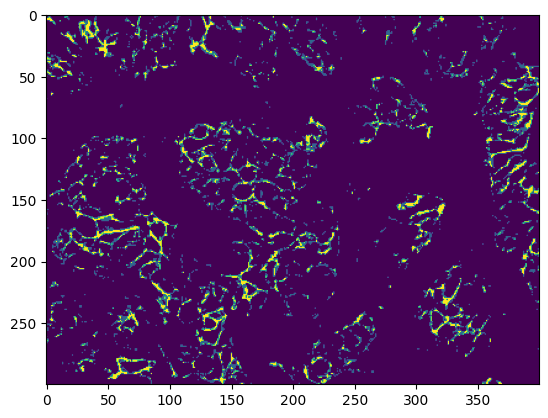

In [5]:
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

q_cont_mask = np.zeros(cont_mask.shape).astype(np.uint8)
th_ranges = np.arange(0.01, 1, .005)
for i, c in enumerate([0.1, 0.2, 0.3]):
    q_cont_mask += ((cont_mask >= c) * i).astype(np.uint8)


lbp = local_binary_pattern(q_cont_mask, P=8, R=1, method="uniform")
lbp = lbp[cont_mask >= 0.1]
hists = np.histogram(lbp, bins=10)[0]
hists = hists / hists.sum()

glcm = graycomatrix(
    q_cont_mask, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
    levels=len(th_ranges), symmetric=True, normed=False
).astype(float)

for i in range(4):
    glcm[0,:,0,i] = 0
    glcm[:,:,0,i] /= glcm[:,:,0,i].sum()

contrast = graycoprops(glcm, "contrast").reshape(-1).mean()
dissim = graycoprops(glcm, "dissimilarity").reshape(-1).mean()
homo = graycoprops(glcm, "homogeneity").reshape(-1).mean()
asm = graycoprops(glcm, "ASM").reshape(-1).mean()
energy = graycoprops(glcm, "energy").reshape(-1).mean()
corrs = graycoprops(glcm, "correlation").reshape(-1).mean()
entropy = np.array([shannon_entropy(glcm[:,:,0,i]) for i in range(4)]).mean()

plt.imshow(q_cont_mask)

In [63]:
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

glcm = graycomatrix(
    q_cont_mask, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
    levels=len(th_ranges), symmetric=True, normed=False
).astype(float)

for i in range(4):
    glcm[0,:,0,i] = 0
    glcm[:,:,0,i] /= glcm[:,:,0,i].sum()

contrast = graycoprops(glcm, "contrast").reshape(-1).mean()
dissim = graycoprops(glcm, "dissimilarity").reshape(-1).mean()
homo = graycoprops(glcm, "homogeneity").reshape(-1).mean()
asm = graycoprops(glcm, "ASM").reshape(-1).mean()
energy = graycoprops(glcm, "energy").reshape(-1).mean()
corrs = graycoprops(glcm, "correlation").reshape(-1).mean()
entropy = np.array([shannon_entropy(glcm[:,:,0,i]) for i in range(4)]).mean()

In [65]:
entropy

np.float64(0.0025050450785144263)